In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
os.chdir("/Users/serrauzun/Desktop/MSDS_422_Practical")
df = pd.read_csv('HMEQ_Loss_clean.csv')

We will remove the variables with binary data as for our kmeans clustering model we should only have variables with continous data

In [4]:
drop = df[[ 'REASON_DebtCon', 'REASON_HomeImp', 'REASON_Missing', 'JOB_Mgr', 'JOB_Missing', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']]
df = df.drop(drop, axis=1)
TARGET = df[['TARGET_BAD_FLAG']]

In [5]:
x = df.copy()
x = x.drop(TARGET, axis=1)
varNames = x.columns

Now we will standardize our dataset with only continous data to prepare it for the model

In [6]:
theScaler = StandardScaler()
theScaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
x_trn = theScaler.transform(x)
x_trn = pd.DataFrame(x_trn)
print(x_trn.head().T)

           0         1         2         3         4
0  -0.279351 -0.212870 -0.261452 -0.167981 -0.370407
1  -1.573958 -1.555650 -1.537343 -1.537343 -1.519036
2  -1.230735 -0.005036 -1.573541 -0.144654  0.764531
3  -1.266822 -0.640043 -1.743174 -0.195473  0.290257
4   0.244005 -0.241087 -0.656880 -0.241087 -0.795477
5  -0.281418 -0.281418 -0.281418 -0.281418 -0.281418
6  -0.373319  1.475452 -0.373319 -0.373319 -0.373319
7  -1.009413 -0.681092 -0.350779 -0.063897 -1.021765
8  -0.095518 -0.701393 -0.095518 -0.095518 -0.701393
9  -1.234969 -0.723366 -1.132648 -0.109443 -0.723366
10 -1.686771 -1.686771 -1.686771 -1.686771 -1.686771


In [8]:
varNames_trn = []
for i in varNames:    
    newName = "trn_" + i    
    varNames_trn.append(newName)
print(varNames_trn)

['trn_TARGET_LOSS_AMT', 'trn_LOAN', 'trn_MORTDUE', 'trn_VALUE', 'trn_YOJ', 'trn_DEROG', 'trn_DELINQ', 'trn_CLAGE', 'trn_NINQ', 'trn_CLNO', 'trn_DEBTINC']


In [9]:
x_trn.columns = varNames_trn
print(x_trn.head().T)

                            0         1         2         3         4
trn_TARGET_LOSS_AMT -0.279351 -0.212870 -0.261452 -0.167981 -0.370407
trn_LOAN            -1.573958 -1.555650 -1.537343 -1.537343 -1.519036
trn_MORTDUE         -1.230735 -0.005036 -1.573541 -0.144654  0.764531
trn_VALUE           -1.266822 -0.640043 -1.743174 -0.195473  0.290257
trn_YOJ              0.244005 -0.241087 -0.656880 -0.241087 -0.795477
trn_DEROG           -0.281418 -0.281418 -0.281418 -0.281418 -0.281418
trn_DELINQ          -0.373319  1.475452 -0.373319 -0.373319 -0.373319
trn_CLAGE           -1.009413 -0.681092 -0.350779 -0.063897 -1.021765
trn_NINQ            -0.095518 -0.701393 -0.095518 -0.095518 -0.701393
trn_CLNO            -1.234969 -0.723366 -1.132648 -0.109443 -0.723366
trn_DEBTINC         -1.686771 -1.686771 -1.686771 -1.686771 -1.686771


Now that we have our dataset transformed, we can start the KMeans Clustering model

We will now create lists for our clusters (K), inertia score (I), silhouette score (S) and calinski harabaz score (C). Then following creation of these empty list we will set a lower and upper limit to the number of clusters we want the model to use, in this case min 3 and max 12, and then append each score per this clustering.

In [10]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

In [14]:
for K in range(3,12):
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(x_trn)
    #y = km.predict(x_trn)
    K_LIST.append(K)
    I_LIST.append(km.inertia_)
    S_LIST.append(silhouette_score(x_trn,km.labels_))
    C_LIST.append(calinski_harabaz_score(x_trn,km.labels_))

In [15]:
def drawElbow(K, SCORE, LABEL):
    plt.plot(K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

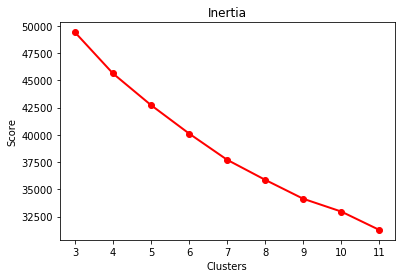

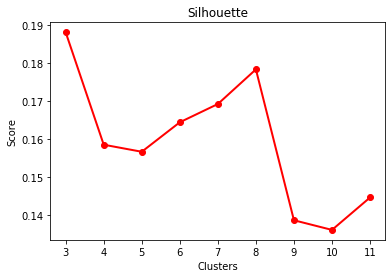

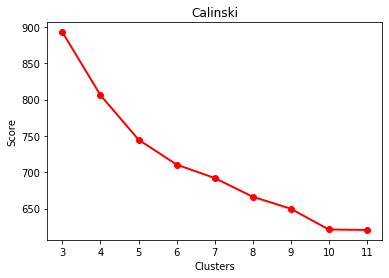

In [16]:
drawElbow(K_LIST, I_LIST, "Inertia" )
drawElbow(K_LIST, S_LIST, "Silhouette" )
drawElbow(K_LIST, C_LIST, "Calinski" )

By looking at the Intertia, Silhouette and Calinski graphs, it seems to be the safe and reasonable approach to set the clusters from 3,12 to 4,6. The new min and max number of clusters are determined by evaluation where the elbows in the line graph occur as well as peaks and dives. 

Now we write and run the clusterdata function which will give us information such as mean and count for each cluster specified

In [17]:
def clusterData(df, x_trn, K, TARGET) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 2 )
    km.fit(x_trn)
    Y = km.predict(x_trn)
    df["CLUSTER"] = Y

    G = df.groupby("CLUSTER")
    print(G.mean())
    print("\n\n\n")
    print(G['TARGET_BAD_FLAG'].value_counts())

As we have our function above, we can now try the number of clusters we 

In [18]:
clusterData(df, x_trn, 4, TARGET)






K =  4
         TARGET_BAD_FLAG  TARGET_LOSS_AMT          LOAN        MORTDUE  \
CLUSTER                                                                  
0               0.064205       489.808186  20351.765650   54682.121677   
1               0.943888     19510.012024  21983.366733   71695.125952   
2               0.080000      1033.268837  23346.883721  124020.594102   
3               0.173298      1258.192700  15060.999671   57353.784308   

                 VALUE        YOJ     DEROG    DELINQ       CLAGE      NINQ  \
CLUSTER                                                                       
0         85388.898331  17.710594  0.081862  0.276886  243.165753  0.817014   
1        101512.949900   8.257916  1.511022  2.238477  155.567166  2.352705   
2        169667.082326   7.680000  0.073488  0.216744  208.958853  0.978605   
3         78020.740454   5.517248  0.128576  0.220980  145.601766  1.164420   

              CLNO    DEBTINC  
CLUSTER                        
0    

The clustering with 4 clusters gave is the most distinc clusters. When we look at cluster 1 in our clusterData output where we used K=4, we can see that in none of the clusters the counts of 1 and 0 are too close too each other, which is what we want to see. Esspecially with cluster 1 we see that there are a distinc number of defaulted credits in it and when we further look into the data the mean for DEROG and DEBTINC are significantly different from the rest of the clusters. Therefore, the above clustering gives us the best results, and also the most consistent results with our other models with the same dataset.

In [19]:
clusterData(df, x_trn, 5, TARGET)





K =  5
         TARGET_BAD_FLAG  TARGET_LOSS_AMT          LOAN        MORTDUE  \
CLUSTER                                                                  
0               0.084998       641.933803  16129.377203   60058.933020   
1               0.065817       847.424628  23966.772824  127738.148907   
2               0.557358      4937.345307  12381.460023   54807.455272   
3               0.043286       356.719081  20999.646643   55100.263251   
4               0.956873     22050.832884  24298.113208   76314.458302   

                 VALUE        YOJ     DEROG    DELINQ       CLAGE      NINQ  \
CLUSTER                                                                       
0         81989.342930   5.521739  0.120642  0.212691  147.026853  1.120251   
1        175364.248938   7.749469  0.072187  0.203822  217.157368  0.972399   
2         74675.325585   7.290556  0.222480  0.428737  149.730005  1.457706   
3         86024.216484  18.010866  0.086572  0.285336  247.070751  0.789753

In [20]:
clusterData(df, x_trn, 6, TARGET)





K =  6
         TARGET_BAD_FLAG  TARGET_LOSS_AMT          LOAN        MORTDUE  \
CLUSTER                                                                  
0               0.058887       681.556745  23946.573876  127692.715493   
1               0.082084       595.375296  16124.704025   59931.446330   
2               0.989761     24401.102389  25609.897611   81673.419898   
3               0.733871     11133.532258  17810.483871   60146.975806   
4               0.040816       319.073647  21010.825200   55073.801242   
5               0.558304      5003.289753  12495.759717   55426.143581   

                 VALUE        YOJ     DEROG    DELINQ       CLAGE      NINQ  \
CLUSTER                                                                       
0        175363.864561   7.731263  0.074946  0.190578  217.258105  0.966809   
1         81861.772691   5.514601  0.105367  0.208761  147.039339  1.123915   
2        116554.626280   9.254608  0.542662  3.003413  167.051568  2.112628   
3